In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("finadatatrain.csv")
test=pd.read_csv("finadatatest.csv")

In [12]:
train.head(2)
train.isnull().sum()
train.fillna(0,inplace=True)

In [13]:
train.isnull().sum()

Unnamed: 0                                   0
Total_Stops                                  0
Price                                        0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_K

In [14]:
test.head(2)

,Unnamed: 0,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Kolkata,Destination_New Delhi,Journeyday,Journeymonth,Dephour,Depmin,Arrivalhour,Arrivalmin,Durationhours,Durationmins
0,0,1,0,0,0,1,0,0,0,0,...,0,0,6,6,17,30,4,25,10,55
1,1,1,0,0,1,0,0,0,0,0,...,0,0,12,5,6,20,10,20,4,0


In [15]:
train.columns

Index(['Unnamed: 0', 'Total_Stops', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journeyday',
       'Journeymonth', 'Dephour', 'Depmin', 'Arrivalhour', 'Arrivalmin',
       'Durationhours', 'Durationmins'],
      dtype='object')

In [16]:
x=train[[ 'Total_Stops', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journeyday',
       'Journeymonth', 'Dephour', 'Depmin', 'Arrivalhour', 'Arrivalmin',
       'Durationhours', 'Durationmins']]
print(x.shape)
x.head(2)


(10683, 29)


,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Kolkata,Destination_New Delhi,Journeyday,Journeymonth,Dephour,Depmin,Arrivalhour,Arrivalmin,Durationhours,Durationmins
0,0.0,0,0,1,0,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,2.0,1,0,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25


In [19]:
y=train["Price"]
print(y.shape)
y.head(2)

(10683,)


0    3897
1    7662
Name: Price, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [21]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape) 
print(ytest.shape)

(8546, 29)
(2137, 29)
(8546,)
(2137,)


In [22]:
from sklearn.ensemble import ExtraTreesRegressor # creating model and fitting data sets to egt best features among them 
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [23]:
model.feature_importances_ #important feature

array([2.52634803e-01, 9.12446890e-03, 2.03029799e-03, 1.87118161e-02,
       1.36481279e-01, 6.70564693e-02, 1.85607983e-02, 8.53245532e-04,
       3.35080669e-03, 1.16607568e-04, 5.16457279e-03, 8.62685848e-05,
       5.95659238e-04, 1.06079978e-02, 3.20065518e-03, 5.94183288e-03,
       8.55528600e-03, 1.18886961e-02, 6.31830223e-03, 5.34093032e-04,
       2.47740917e-02, 1.43210359e-01, 5.39856837e-02, 2.45383362e-02,
       2.13936253e-02, 2.79737620e-02, 1.86409571e-02, 1.05737188e-01,
       1.79320410e-02])

In [24]:
from sklearn.ensemble import RandomForestRegressor #random forest regressor
regressor=RandomForestRegressor()

In [28]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
max_features = ["auto", "sqrt"]
print(max_features)
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
min_samples_split = [2, 5, 10, 15, 100]
print(min_samples_split)
min_samples_leaf = [1, 2, 5, 10]
print(min_samples_leaf)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30]
[2, 5, 10, 15, 100]
[1, 2, 5, 10]


In [29]:
random_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:

rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV # creating model that perfrom hyperparameter tunning (random search cv)
cv=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring="neg_mean_squared_error", n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [31]:
cv.fit(xtrain,ytrain) #fitting rondom search cv in xtrain and y train

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [32]:
cv.best_params_ #best estimators are as follows

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [33]:
cv.best_score_

-3744229.3874119176

In [34]:
predictions=cv.predict(xtest) #predicting Xtest
print(predictions)

[ 5654.68264726 10965.28590194 10715.76320133 ... 12639.68730603
 11620.67752108  8749.0369276 ]


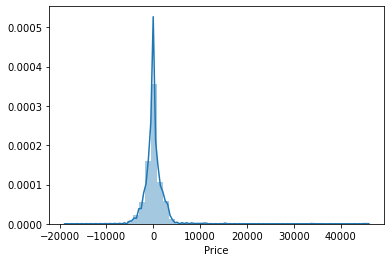

In [36]:
sns.distplot(ytest-predictions) #plotting sns ytest-ypred

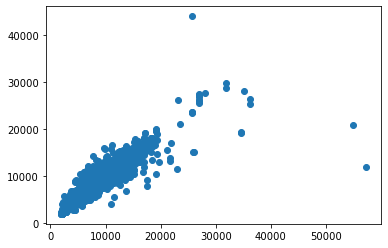

In [39]:
plt.scatter(ytest,predictions) #scatter plot for ytest and predcited value

In [40]:
#creating ,fitting applying random forest model
regressor=RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=1,max_features="auto",max_depth=20)
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)
#score=accuracy_score(ypred,ytest)
from sklearn.metrics import r2_score # r2 for accuracy sore in regression problem
finalscore=r2_score(ytest, ypred)

In [41]:
# confusiom matrix for regression problem
#confusion_matrix(ytest,ypred)
cutoff = 0.7                              # decide on a cutoff limit
ypred_classes = np.zeros_like(ypred)    # initialise a matrix full with zeros
ypred_classes[ypred > cutoff] = 1

In [45]:
from sklearn.metrics import confusion_matrix
ytest_classes = np.zeros_like(ypred)
ytest_classes[ytest > cutoff] = 1
confusion_matrix(ytest_classes, ypred_classes)

array([[2137]], dtype=int64)

In [43]:
print("score of our mdoel is ",+finalscore)

score of our mdoel is  0.790530016851713
